In [51]:
import pandas as pd
import yfinance as yf

# 获取股票历史数据
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2023-01-01'
data = yf.download(ticker, start=start_date, end=end_date)

# 查看数据前几行
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.796036  72.856628  71.545402  71.799888  135480400
2020-01-03  72.088287  72.851753  71.862884  72.020424  146322800
2020-01-06  72.662712  72.701492  70.954002  71.206070  118387200
2020-01-07  72.320976  72.929322  72.100418  72.672409  108872000
2020-01-08  73.484360  73.787323  72.022865  72.022865  132079200


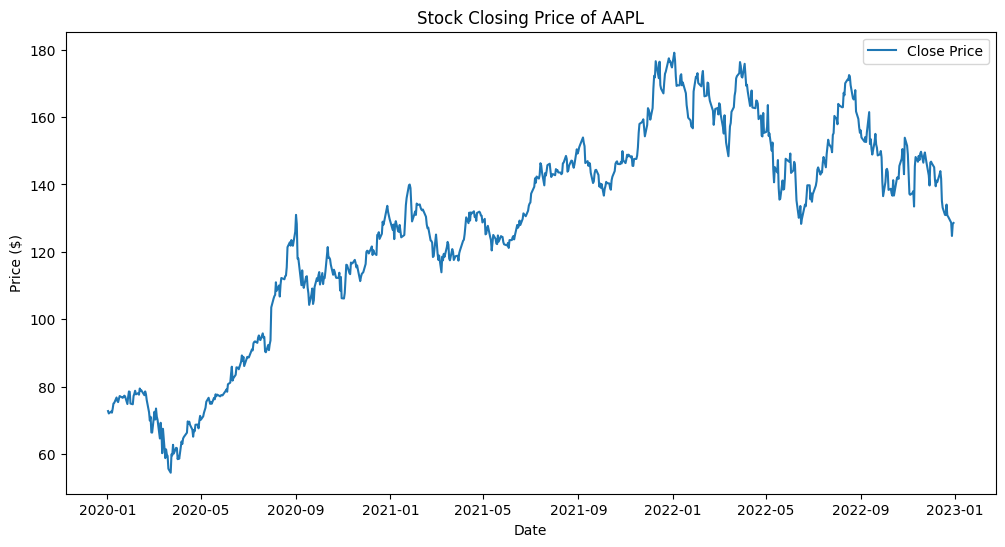

In [52]:
import matplotlib.pyplot as plt

# 绘制股票收盘价走势图
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.title('Stock Closing Price of AAPL')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(False)
plt.show()

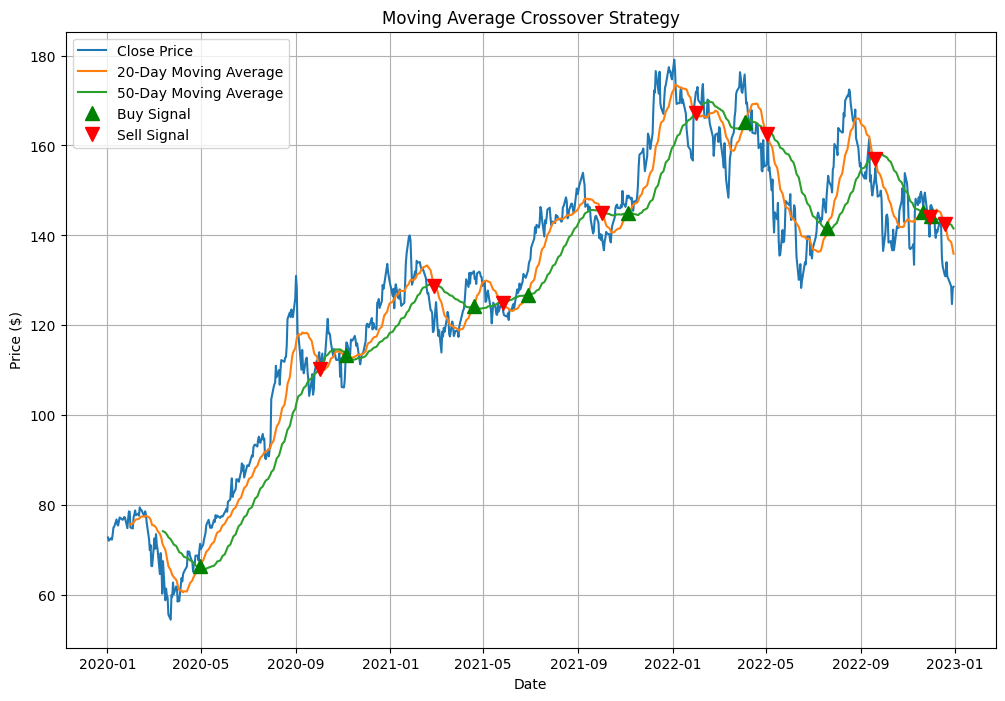

In [53]:
import numpy as np

# 计算短期和长期移动平均
data['Short_MA'] = data['Close'].rolling(window=20).mean()
data['Long_MA'] = data['Close'].rolling(window=50).mean()

# 生成交易信号
data['Signal'] = np.where(data['Short_MA'] > data['Long_MA'], 1, 0)
data['Position'] = data['Signal'].diff()

# 绘制移动平均线和交易信号
plt.figure(figsize=(12, 8))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['Short_MA'], label='20-Day Moving Average')
plt.plot(data['Long_MA'], label='50-Day Moving Average')
plt.plot(data[data['Position'] == 1].index, data['Short_MA'][data['Position'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(data[data['Position'] == -1].index, data['Short_MA'][data['Position'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')
plt.title('Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

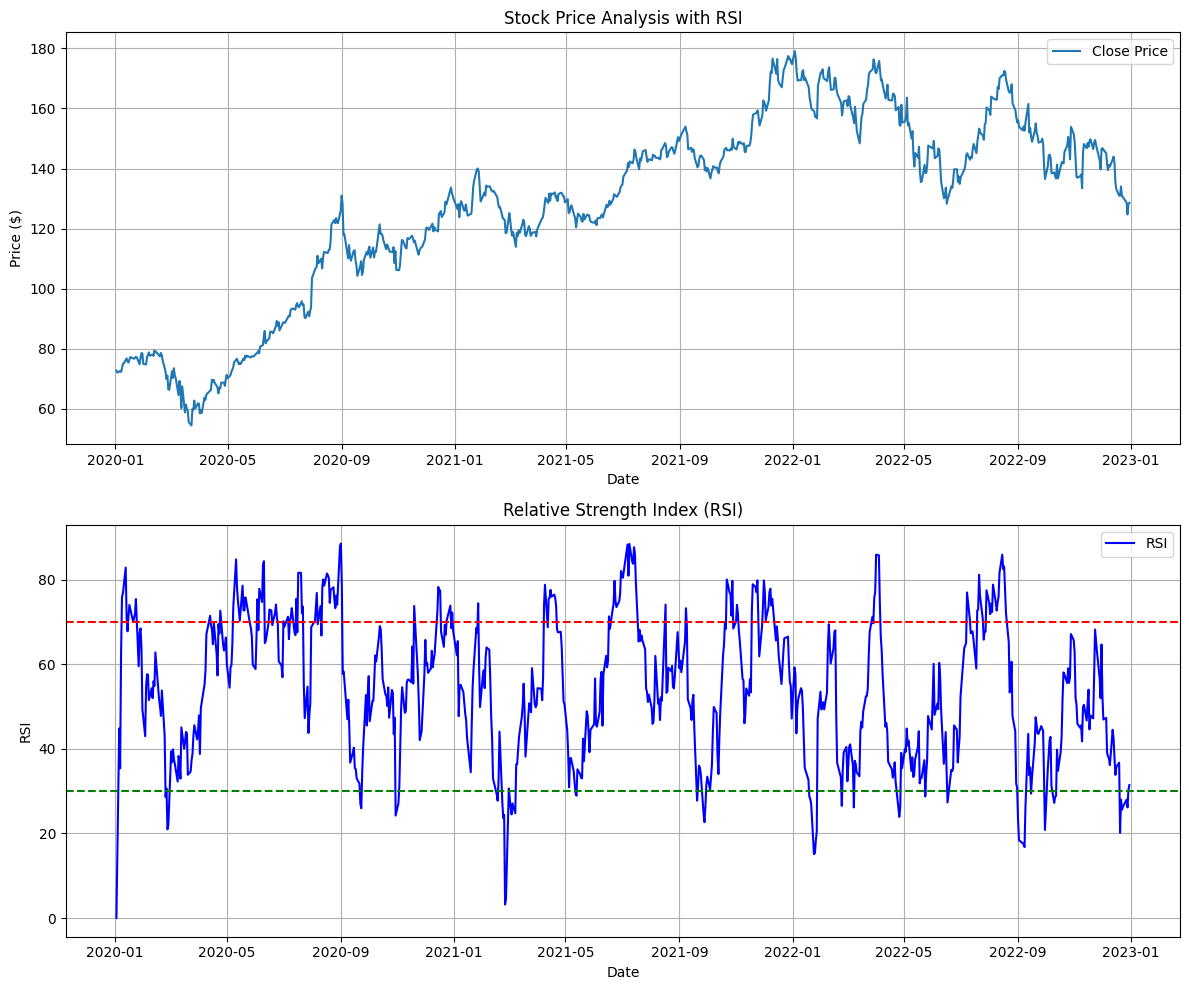

In [54]:
# 计算相对强弱指数（RSI）
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# 计算布林带
def calculate_bollinger_bands(data, window=20):
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()

    data['Upper_Band'] = rolling_mean + 2 * rolling_std
    data['Lower_Band'] = rolling_mean - 2 * rolling_std

calculate_bollinger_bands(data)

# 绘制RSI和布林带图表
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.plot(data['Close'], label='Close Price')
plt.title('Stock Price Analysis with RSI')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(data['RSI'], label='RSI', color='b')
plt.axhline(70, color='r', linestyle='--')
plt.axhline(30, color='g', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [55]:
data.head(30)

Price,Close,High,Low,Open,Volume,Short_MA,Long_MA,Signal,Position,RSI,Upper_Band,Lower_Band
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,
Date,,,,,,,,,,,,
2020-01-02,72.796036,72.856628,71.545402,71.799888,135480400,NaN,NaN,0,NaN,NaN,NaN,NaN
2020-01-03,72.088287,72.851753,71.862884,72.020424,146322800,NaN,NaN,0,0.0,0.000000,NaN,NaN
2020-01-06,72.662712,72.701492,70.954002,71.206070,118387200,NaN,NaN,0,0.0,44.800871,NaN,NaN
2020-01-07,72.320976,72.929322,72.100418,72.672409,108872000,NaN,NaN,0,0.0,35.372964,NaN,NaN
2020-01-08,73.484360,73.787323,72.022865,72.022865,132079200,NaN,NaN,0,0.0,62.347538,NaN,NaN
2020-01-09,75.045219,75.239113,74.213890,74.465950,170108400,NaN,NaN,0,0.0,75.863672,NaN,NaN
2020-01-10,75.214859,75.782013,74.710731,75.280304,140644800,NaN,NaN,0,0.0,76.769973,NaN,NaN
2020-01-13,76.821800,76.848465,75.413627,75.532394,121532000,NaN,NaN,0,0.0,82.864816,NaN,NaN


In [98]:
import backtrader as bt
import pandas as pd
import yfinance as yf

# 1. 数据预处理（关键修复）
def get_clean_data():
    # 下载数据
    data = yf.download('AAPL', '2000-01-01', '2023-01-01')
    
    # 移除多层列索引
    data.columns = data.columns.droplevel(1)  # 删除ticker层级
    
    # 重命名并选择必要列
    data = data.rename(columns={
        'Open': 'open',
        'High': 'high',
        'Low': 'low',
        'Close': 'close',
        'Volume': 'volume'
    })[['open', 'high', 'low', 'close', 'volume']]
    
    # 处理索引
    data.index = pd.to_datetime(data.index)
    return data.dropna()

# 2. 策略类保持不变
class MAStrategy(bt.Strategy):
    params = (('short_period',10), ('long_period',20))
    
    def __init__(self):
        self.short_ma = bt.indicators.SMA(self.data.close, period=self.params.short_period)
        self.long_ma = bt.indicators.SMA(self.data.close, period=self.params.long_period)
        self.crossover = bt.indicators.CrossOver(self.short_ma, self.long_ma)
        
    def next(self):
        if not self.position:
            if self.crossover > 0:
                self.buy()
        else:
            if self.crossover < 0:
                self.close()
                
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return

        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' % 
                        (order.executed.price, 
                        order.executed.value, 
                        order.executed.comm))
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                        (order.executed.price, 
                        order.executed.value, 
                        order.executed.comm))
            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' % 
                (trade.pnl, trade.pnlcomm))

    def log(self, txt, dt=None, doprint=True):
        dt = dt or self.datas[0].datetime.date(0)
        if doprint:
            print('%s, %s' % (dt.isoformat(), txt))

# 3. 回测执行函数
def run_backtest():
    cerebro = bt.Cerebro()
    
    # 添加数据（关键修复）
    data = get_clean_data()
    data_feed = bt.feeds.PandasData(
        dataname=data,
        datetime=None,    # 自动识别时间索引
        open=0,           # 明确指定列位置
        high=1,
        low=2,
        close=3,
        volume=4,
        openinterest=-1
    )
    cerebro.adddata(data_feed)
    
    # 添加策略
    cerebro.addstrategy(MAStrategy)
    
   
    # 添加分析器
    cerebro.addanalyzer(bt.analyzers.Returns, _name='returns')
    cerebro.addanalyzer(bt.analyzers.DrawDown, _name='drawdown')
    cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='SharpeRatio')
    
    # 设置参数
    cerebro.broker.setcash(100000)
    cerebro.broker.setcommission(commission=0.0006)
    
    cerebro.addsizer(bt.sizers.PercentSizer, percents=90)
    results = cerebro.run()
    
    # 运行回测
    print('初始资金:', cerebro.broker.getvalue())
    print('最终资金:', cerebro.broker.getvalue())
    print('年化回报率:', results[0].analyzers.returns.get_analysis()['rnorm100'])
    print('夏普值:', results[0].analyzers.SharpeRatio.get_analysis()['sharperatio'])
    print('最大回撤:', results[0].analyzers.drawdown.get_analysis()['max']['drawdown'])
    
    # 绘图
    cerebro.plot(style='candlestick')

if __name__ == '__main__':
    run_backtest()

[*********************100%***********************]  1 of 1 completed


2000-02-14, BUY EXECUTED, Price: 0.82, Cost: 90465.47, Comm 54.28
2000-04-12, SELL EXECUTED, Price: 0.90, Cost: 90465.47, Comm 59.09
2000-04-12, OPERATION PROFIT, GROSS 8017.30, NET 7903.93
2000-05-02, BUY EXECUTED, Price: 0.93, Cost: 96283.47, Comm 57.77
2000-05-05, SELL EXECUTED, Price: 0.83, Cost: 96283.47, Comm 51.94
2000-05-05, OPERATION PROFIT, GROSS -9716.23, NET -9825.94
2000-05-08, BUY EXECUTED, Price: 0.84, Cost: 87465.49, Comm 52.48
2000-05-10, SELL EXECUTED, Price: 0.78, Cost: 87465.49, Comm 48.72
2000-05-10, OPERATION PROFIT, GROSS -6266.70, NET -6367.90
2000-06-15, BUY EXECUTED, Price: 0.69, Cost: 83280.60, Comm 49.97
2000-07-27, SELL EXECUTED, Price: 0.75, Cost: 83280.60, Comm 54.76
2000-07-27, OPERATION PROFIT, GROSS 7985.80, NET 7881.08
2000-08-23, BUY EXECUTED, Price: 0.78, Cost: 89252.75, Comm 53.55
2000-09-21, SELL EXECUTED, Price: 0.88, Cost: 89252.75, Comm 60.87
2000-09-21, OPERATION PROFIT, GROSS 12192.97, NET 12078.55
2000-11-08, BUY EXECUTED, Price: 0.32, Cost:

<IPython.core.display.Javascript object>

In [101]:
pip install statsmodels

   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   --- ------------------------------------ 0.8/10.0 MB 4.8 MB/s eta 0:00:02
   ------ --------------------------------- 1.6/10.0 MB 3.7 MB/s eta 0:00:03
   ------- -------------------------------- 1.8/10.0 MB 3.9 MB/s eta 0:00:03
   -------- ------------------------------- 2.1/10.0 MB 2.3 MB/s eta 0:00:04
   -------- ------------------------------- 2.1/10.0 MB 2.3 MB/s eta 0:00:04
   -------- ------------------------------- 2.1/10.0 MB 2.3 MB/s eta 0:00:04
   ---------- ----------------------------- 2.6/10.0 MB 1.7 MB/s eta 0:00:05
   ---------- ----------------------------- 2.6/10.0 MB 1.7 MB/s eta 0:00:05
   ----------- ---------------------------- 2.9/10.0 MB 1.5 MB/s eta 0:00:05
   ----------- ---------------------------- 2.9/10.0 MB 1.5 MB/s eta 0:00:05
   ------------ --------------------------- 3.1/10.0 MB 1.3 MB/s eta 0:00:06
   ----------

In [102]:
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
from backtesting import Backtest, Strategy

# Step 1: 獲取並清理 Fama-French 因子數據
def get_fama_french_factors():
    fama_french_url = "https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/ff_factors_daily.txt"
    ff_factors = pd.read_csv(fama_french_url, skiprows=3, delimiter="\s+")
    ff_factors.columns = ['Date', 'MKT-RF', 'SMB', 'HML', 'RF']
    ff_factors['Date'] = pd.to_datetime(ff_factors['Date'], format='%Y%m%d')
    ff_factors = ff_factors[(ff_factors['Date'] >= '2020-01-01') & (ff_factors['Date'] <= '2023-01-01')]
    ff_factors.set_index('Date', inplace=True)
    return ff_factors

# Step 2: 獲取 S&P 500 個股數據
def get_stock_data(tickers):
    data = yf.download(tickers, start='2020-01-01', end='2023-01-01', group_by='ticker')
    return data

# Step 3: 計算個股收益率
def calculate_returns(stock_data):
    returns = stock_data['Adj Close'].pct_change().dropna()
    return returns

# Step 4: 回歸分析計算因子暴露
def calculate_factors(stock_returns, factors):
    y = stock_returns - factors['RF']
    X = factors[['MKT-RF', 'SMB', 'HML']]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model.params

# Step 5: 設計 Fama-French 策略
class FamaFrenchStrategy(Strategy):
    def init(self):
        # 只選擇高市場 Beta 的股票
        self.high_beta_stocks = [ticker for ticker, params in factor_exposures.items() if params['MKT-RF'] > 1]
    
    def next(self):
        # 平均分配資金至高 Beta 股票
        weight = 1 / len(self.high_beta_stocks)
        for ticker in self.high_beta_stocks:
            self.buy(ticker, size=self.equity * weight)

# Step 6: 整合回測框架
def run_backtest():
    # 1. 獲取數據
    tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']  # 可以替換為更大股票池
    stock_data = get_stock_data(tickers)
    ff_factors = get_fama_french_factors()
    
    # 2. 計算收益率
    returns = calculate_returns(stock_data)
    
    # 3. 回歸計算因子暴露
    global factor_exposures
    factor_exposures = {ticker: calculate_factors(returns[ticker], ff_factors) for ticker in tickers}
    
    # 4. 進行回測
    bt = Backtest(returns, FamaFrenchStrategy, cash=100000, commission=0.001)
    results = bt.run()
    print(results)
    bt.plot()

if __name__ == "__main__":
    run_backtest()


[*********************100%***********************]  4 of 4 completed


HTTPError: HTTP Error 404: Not Found